Importing libraries to be used and setting display options of Pandas DataFrames.

In [4]:
import pandas as pd
import datetime as dt
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

In [6]:
#Reading csv file to generate DataFrame
df = pd.read_csv("sample_data.csv")   

In [7]:
#First look on the dataset
df.head()

,order_id,date,user_id,total_purchase,latitude,longitude
0,534188,1/1/2018,55205,439000.0,35.659323,51.397546
1,534189,1/1/2018,46288,64000.0,35.688643,51.331780
2,534194,1/1/2018,53219,242000.0,35.681196,51.383196
3,534195,1/1/2018,42800,483000.0,35.690208,51.310495
4,534196,1/1/2018,34064,50000.0,35.689885,51.311519


In [8]:
#Information of variables and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261749 entries, 0 to 261748
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        261749 non-null  int64  
 1   date            261749 non-null  object 
 2   user_id         261749 non-null  int64  
 3   total_purchase  261706 non-null  float64
 4   latitude        261749 non-null  float64
 5   longitude       261749 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 12.0+ MB


As it is seen above, there are missing 'total_purchase'. Those missing values are excluded in this study.

In [9]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261706 entries, 0 to 261748
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        261706 non-null  int64  
 1   date            261706 non-null  object 
 2   user_id         261706 non-null  int64  
 3   total_purchase  261706 non-null  float64
 4   latitude        261706 non-null  float64
 5   longitude       261706 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 14.0+ MB


In [10]:
#Note that the InvoiceDate column is in object datatype. It is converted to datetime64.

df["date"] = df["date"].astype("datetime64")
df.dtypes

order_id                   int64
date              datetime64[ns]
user_id                    int64
total_purchase           float64
latitude                 float64
longitude                float64
dtype: object

In [11]:
df['Day_of_Week'] = pd.to_datetime(df['date'], format='%m/%d/%y').dt.strftime("%A")
df.head()

,order_id,date,user_id,total_purchase,latitude,longitude,Day_of_Week
0,534188,2018-01-01,55205,439000.0,35.659323,51.397546,Monday
1,534189,2018-01-01,46288,64000.0,35.688643,51.331780,Monday
2,534194,2018-01-01,53219,242000.0,35.681196,51.383196,Monday
3,534195,2018-01-01,42800,483000.0,35.690208,51.310495,Monday
4,534196,2018-01-01,34064,50000.0,35.689885,51.311519,Monday


In [12]:
g = df.groupby(['date'],as_index=False).order_id.count()
g.rename(columns={"order_id": "total_demand"},inplace=True)

g['Day_of_Week'] = pd.to_datetime(g['date'], format='%m/%d/%y').dt.strftime("%A")
g


,date,total_demand,Day_of_Week
0,2018-01-01,1714,Monday
1,2018-01-02,1683,Tuesday
2,2018-01-03,1830,Wednesday
3,2018-01-04,1020,Thursday
4,2018-01-05,977,Friday
...,...,...,...
176,2018-06-26,2444,Tuesday
177,2018-06-27,2465,Wednesday
178,2018-06-28,1032,Thursday
179,2018-06-29,944,Friday


In [13]:
frame = g.groupby(g['date'].dt.strftime("%A")).agg({'total_demand':'mean'})
frame

,total_demand
date,
Friday,945.384615
Monday,1676.923077
Saturday,1660.423077
Sunday,1628.760000
Thursday,963.346154
Tuesday,1584.884615
Wednesday,1668.538462


In [14]:
frame['mean'] = g.groupby(g['date'].dt.strftime("%A")).agg({'total_demand':'mean'})
frame['std'] = g.groupby(g['date'].dt.strftime("%A")).agg({'total_demand':'std'})
# m.drop('total_demand', axis=1, inplace=True)

# Table of 	total_demand_mean	total_demand_std for weekdays

In [15]:
frame.drop('total_demand', axis=1, inplace=True)
frame.columns = ['total_demand mean','total_demand std']

frame

,total_demand mean,total_demand std
date,,
Friday,945.384615,86.915627
Monday,1676.923077,439.083038
Saturday,1660.423077,514.020947
Sunday,1628.760000,424.825089
Thursday,963.346154,138.993796
Tuesday,1584.884615,406.831201
Wednesday,1668.538462,399.928617


# Histogram for weekdays and weekends

Text(0.5, 0, 'Demand')

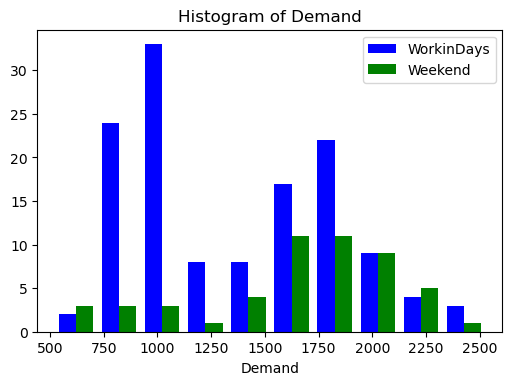

In [16]:
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100
 
from IPython.core.pylabtools import figsize

# Setting colors and names

colors=['blue', 'green']
names=['WorkinDays', 'Weekend']

# Create histogram on MEDV column (target column)
figsize(6, 4)
 
# Create list of data according to different accessibility index
#
x_1 = list(g[g['Day_of_Week']=='Monday'].total_demand)
x_2 = list(g[g['Day_of_Week']=='Tuesday'].total_demand)
x_3 = list(g[g['Day_of_Week']=='Wednesday'].total_demand)
x_4 = list(g[g['Day_of_Week']=='Thursday'].total_demand)
x_5 = list(g[g['Day_of_Week']=='Friday'].total_demand)
x_6 = list(g[g['Day_of_Week']=='Saturday'].total_demand)
x_7 = list(g[g['Day_of_Week']=='Sunday'].total_demand)

WorkinDays = x_1 + x_2 + x_3 + x_4  + x_5  
Weekend = x_6  + x_7
 
plt.hist([WorkinDays, Weekend], color=colors, label=names)
 
# Set the legend and labels
#
plt.legend()
plt.title('Histogram of Demand')
plt.xlabel('Demand')

# Customer Segmentation by RFM Analysis



RFM Analysis enables companies to rank customers in a quantitative manner. This technique takes its name from Recency, Frequency and Monetary values of customers.

- Recency defines how recent the customer activity is and more recent activity means more valuable customers.

- Frequency defines the customers' behaviour on transactions and activities. The more frequently a customer is showing activity, the better customer is considered as.

- Monetary defines the total transaction amount of customer. A greater amount of monetary means a more valuable customer.
These are the metrics used on evaluating customers. Note that, order of these metrics as Recency, Frequency and Monetary are not randomly picked. These metrics are ordered by their importance on evaluating a customer which resulted in naming the technique as RFM.

To perform the analysis, an analysis date must be determined to assign Recency values. 
Time period between the transaction
date and analysis date will be assigned as Recency value. In that case, 2 days after
the most recent transaction is determined as the analysis date.

In [17]:
analysis_date = df["date"].max() + dt.timedelta(days = 2)
print("Date of last order seen in dataset: {}".format(df["date"].max()))
print("Date of the RFM analysis: {}".format(analysis_date))
print("Time period between these two dates: {}".format(analysis_date - df["date"].max()))

Date of last order seen in dataset: 2018-06-30 00:00:00
Date of the RFM analysis: 2018-07-02 00:00:00
Time period between these two dates: 2 days 00:00:00


A new dataframe which contains the RFM values can be generated now. Groupby method
is used to create the new dataframe by grouping all Customer ID values. After all 
customers are grouped, aggregation method is used to calculate and assign the RFM values.

In [18]:
rfm = df.groupby("user_id").agg({"date": [lambda LastOrder: (analysis_date - LastOrder.max()).days],
                                 "order_id": [lambda Frequency: Frequency.nunique()],
                                 "total_purchase": lambda TotalMoney: TotalMoney.sum()})
rfm.head()

,date,order_id,total_purchase
,<lambda>,<lambda>,<lambda>
user_id,,,
10000,15,6,822000.0
10001,27,3,185000.0
10002,5,3,163000.0
10003,31,4,1159000.0
10004,133,2,338000.0


In [19]:
rfm = rfm.reset_index()
rfm.columns = ["customer_id", "recency", "frequency", "monetary"]
rfm.head()

,customer_id,recency,frequency,monetary
0,10000,15,6,822000.0
1,10001,27,3,185000.0
2,10002,5,3,163000.0
3,10003,31,4,1159000.0
4,10004,133,2,338000.0


In [20]:
#Descriptive statistics of RFM values can be observed below.
rfm[["recency", "frequency", "monetary"]].describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
recency,52756.0,3.397161e+01,33.830690,2.0,2.0,5.0,9.0,22.0,48.0,80.0,153.0,182.0
frequency,52756.0,4.960687e+00,2.179033,1.0,1.0,2.0,3.0,5.0,6.0,8.0,11.0,16.0
monetary,52756.0,1.262361e+06,894090.803094,50000.0,82000.0,370000.0,676000.0,1138000.0,1697000.0,2316000.0,3593000.0,102125000.0


Now the client should enter 'K': the number of clusters

To compare the RFM values among each other, scaling and segmenting is applied.
Results are added to dataframe as RFM scores as explained in RFM theory section.

Note that recency score is ordered backwards as 5 corresponds to smallest values.
Reason behind that is the more customer is recent, the higher recency score is.

In [22]:
k = 5
l = []
for i in range(1,k+1):
    l.append(i)
backward = l[::-1]

rfm["recency_score"] = pd.qcut(rfm["recency"], k, backward)
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), k, l)
rfm["monetary_score"] = pd.qcut(rfm["monetary"], k, l)

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,10000,15,6,822000.0,4,4,2
1,10001,27,3,185000.0,3,1,1
2,10002,5,3,163000.0,5,1,1
3,10003,31,4,1159000.0,2,2,3
4,10004,133,2,338000.0,1,1,1


With the RFM scores calculations, all variables are scored in the same scale.
Now that overall RFM scores can be calculated. Overall scores are calculated
by adjoining the recency and frequency scores as explained in theory section.

In [23]:
rfm["rfm_score"] = rfm["recency_score"].astype("str") + rfm["frequency_score"].astype("str")
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,10000,15,6,822000.0,4,4,2,44
1,10001,27,3,185000.0,3,1,1,31
2,10002,5,3,163000.0,5,1,1,51
3,10003,31,4,1159000.0,2,2,3,22
4,10004,133,2,338000.0,1,1,1,11


As RFM scores are calculated, segmentation can be performed. The map used for segmentation can be seen below.

In [26]:
segments_map = {}
j = k
while j>1:
    if j!=3:
        segments_map.update({r'[' + str(1) + '-' + str(k) + ']['+ str(j-1) + '-' + str(j) + ']' : 'cluster_' + str(j)})
        j = j - 1
    else:
        segments_map.update({r'[' + str(1) + '-' + str(2) + ']['+ str(j-2) + '-' + str(j) + ']' : 'cluster_' + str(j)})
        segments_map.update({r'[' + str(2) + '-' + str(3) + ']['+ str(j-2) + '-' + str(j) + ']' : 'cluster_' + str(j-1)})
        segments_map.update({r'[' + str(3) + '-' + str(k) + ']['+ str(j-2) + '-' + str(j) + ']' : 'cluster_' + str(j-2)})
        break


Regular expressions and replace method are used for assignment of persona
on customers depending on RFM score.

In [27]:
rfm['segment'] = rfm["rfm_score"].replace(segments_map, regex=True)
rfm.head(11)

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
0,10000,15,6,822000.0,4,4,2,44,cluster_5
1,10001,27,3,185000.0,3,1,1,31,cluster_2
2,10002,5,3,163000.0,5,1,1,51,cluster_1
3,10003,31,4,1159000.0,2,2,3,22,cluster_3
4,10004,133,2,338000.0,1,1,1,11,cluster_3
5,10005,21,3,250000.0,3,1,1,31,cluster_2
6,10006,21,6,961000.0,3,4,3,34,cluster_5
7,10007,7,7,1206000.0,5,4,3,54,cluster_5
8,10008,36,5,2072000.0,2,3,5,23,cluster_4
9,10009,25,5,2426000.0,3,3,5,33,cluster_4


Customer segmentation on RFM is completed. Now that descriptive statistics of
each segment can be analyzed.

# Claculate the mean of RFM factors 

In [28]:
rfm.groupby("segment").agg({"recency": ["mean"],
                            "frequency": ["mean"],
                            "monetary": ["mean"]})

,recency,frequency,monetary
,mean,mean,mean
segment,,,
cluster_1,8.479908,3.204618,8.189105e+05
cluster_2,22.523157,3.112086,7.910951e+05
cluster_3,75.891596,2.735739,6.894985e+05
cluster_4,29.939627,4.761824,1.210065e+06
cluster_5,21.420150,7.094020,1.809034e+06


# Plot the Recency vs frequency of segments

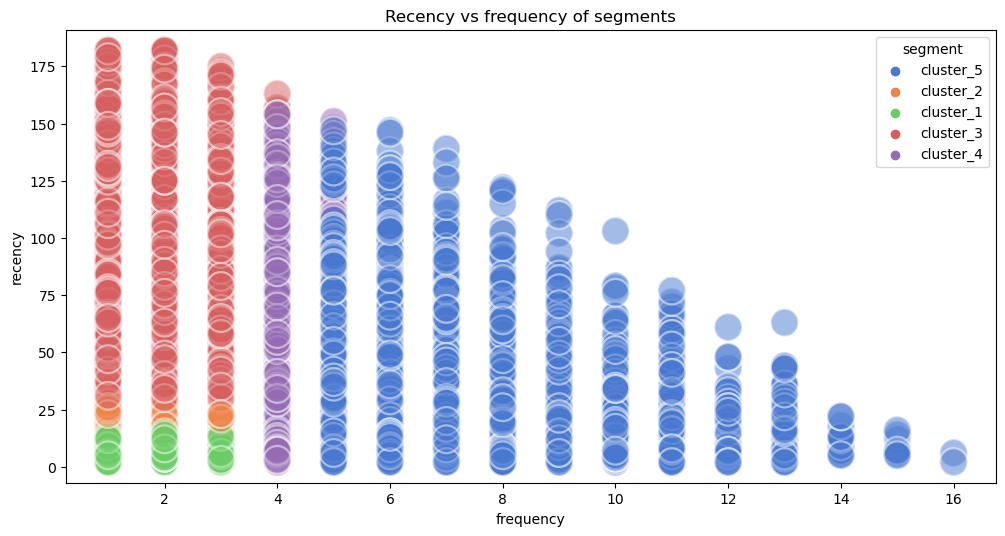

In [29]:
import seaborn as sns
df_analysis = rfm

palette = sns.color_palette("coolwarm")

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='frequency', y='recency', data=df_analysis, hue='segment', s=400, alpha=.5, palette="muted")


ax.set_title('Recency vs frequency of segments')
ax.get_legend()
plt.show()